## Channel with Action-Dependent State Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

### Noncausal Channel State Information

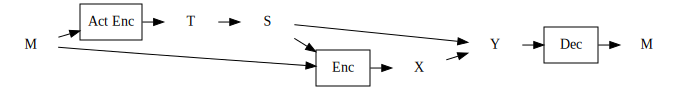

In [2]:
M, X, S, Y, T = rv("M, X, S, Y, T")
R = real("R")

# Channel with action-dependent state available noncausally at encoder [Weissman 2010]
model = CodingModel()
model.set_rate(M, R)                    # The rate of M is R
model.add_node(M, T, label = "Act Enc") # Action encoder maps M to T
model.add_edge(T, S)                    # Channel T -> S
model.add_node(M+S, X, label = "Enc")   # Encoder maps M, S to X
model.add_edge(S+X, Y)                  # Channel S,X -> Y
model.add_node(Y, M, label = "Dec")     # Decoder maps Y to M

model.graph(ranksep = 0.3)              # Draw diagram

In [3]:
# Automatic inner bound
r = model.get_inner()
r

( ( R >= 0 )
 &( R <= I(A_T+A_X&Y)-I(A_X&S|A_T) )
 &( I(A_X&A_T+S) <= I(A_X&A_T+Y) )
 &( markov(A_T, T, S) )
 &( markov(T, A_T+S, A_X+X) )
 &( markov(A_T+T+A_X, S+X, Y) ) ).exists(A_T+A_X)

In [4]:
# Automatically simplify to give [Weissman 2010]
r = r.simplified(level = 10)
r

( ( R >= 0 )
 &( R <= I(A_X+T&Y)-I(A_X&S|T) )
 &( I(A_X&S|T) <= I(A_X&Y|T) )
 &( markov(A_X+T, S+X, Y) ) ).exists(A_X)

In [5]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> r).proof()

### Causal Channel State Information

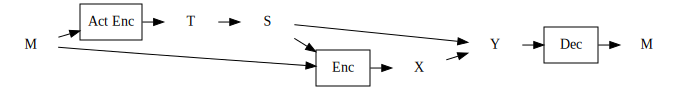

In [6]:
# Channel with action-dependent state available causally at encoder [Weissman 2010]
model = CodingModel()
model.set_rate(M, R)                    # The rate of M is R
model.add_node(M, T, label = "Act Enc") # Action encoder maps M to T
model.add_edge(T, S)                    # Channel T -> S
model.add_node(M+S, X, rv_in_causal = S
                     , label = "Enc")   # Encoder maps M, S to X
model.add_edge(S+X, Y)                  # Channel S,X -> Y
model.add_node(Y, M, label = "Dec")     # Decoder maps Y to M

model.graph(ranksep = 0.3)              # Draw diagram

In [7]:
# Automatic inner bound, gives [Weissman 2010]
r = model.get_inner()
r

( ( R >= 0 )
 &( R <= I(A_T&Y) )
 &( markov(A_T, T, S) )
 &( markov(T, A_T+S, X) )
 &( markov(A_T+T, S+X, Y) ) ).exists(A_T)

In [8]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> r).proof()

### References
- T. Weissman, "Capacity of channels with action-dependent states," IEEE Trans. Inf. Theory, vol. 56, no. 11, pp. 5396-5411, Nov. 2010.
-  S. I. Gel'fand and M. S. Pinsker, "Coding for channel with random parameters," Probl. Contr. and Inf. Theory, vol. 9, no. 1, pp. 19–31, 1980.
-  C. E. Shannon, "Channels with side information at the transmitter," IBM journal of Research and Development, vol. 2, no. 4, pp. 289–293, 1958.